# An Introduction to Majorana's "Stellar" Representation of Spin

## A "star"

We're all familiar with the qubit. 

<img style="display:block; margin:auto" width=300 src="img/qubit.png">

It's just about the simplest quantum system that there is. 

To get started, let's choose some basis states. If we quantize along the $Z$ axis, we can write the state of a qubit as a complex linear superposition of basis states $\mid \uparrow \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $\mid \downarrow \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$:

$\mid \psi \rangle = \alpha\mid \uparrow \rangle + \beta \mid \downarrow \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$

where $|\alpha|^2 + |\beta|^2 = 1$.

There are many qubits in nature: in fact, any two dimensional quantum system can be used as a qubit. But the original point of a qubit was to represent the intrinsic angular momentum, or spin, of a spin-$\frac{1}{2}$ particle. Indeed, a qubit is an irriducible representation of $SU(2)$, which is the double cover of the 3D rotation group $SO(3)$. 

If we consider the expectation values $(\langle \psi \mid \hat{X} \mid \psi \rangle, \langle \psi \mid \hat{Y} \mid \psi \rangle, \langle \psi \mid \hat{Z} \mid \psi \rangle)$, with the Pauli matrices:

$\hat{X} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$, $\hat{Y} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$, $\hat{Z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$

we can associate the qubit uniquely with a point on the unit sphere, which picks out its "average rotation axis." It turns out that this point uniquely determines the state (up to complex phase).

In [17]:
from spheres import *

qubit = qt.rand_ket(2)
print(qubit)
print("xyz: %s" % ([qt.expect(qt.sigmax(), qubit),\
                    qt.expect(qt.sigmay(), qubit),\
                    qt.expect(qt.sigmaz(), qubit)]))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.50212694+0.50076549j]
 [ 0.54008752-0.45321952j]]
xyz: [-0.9962983741962657, -0.08576693188845602, 0.005795081390174539]


We can visualize it with matplotlib:

<IPython.core.display.Javascript object>


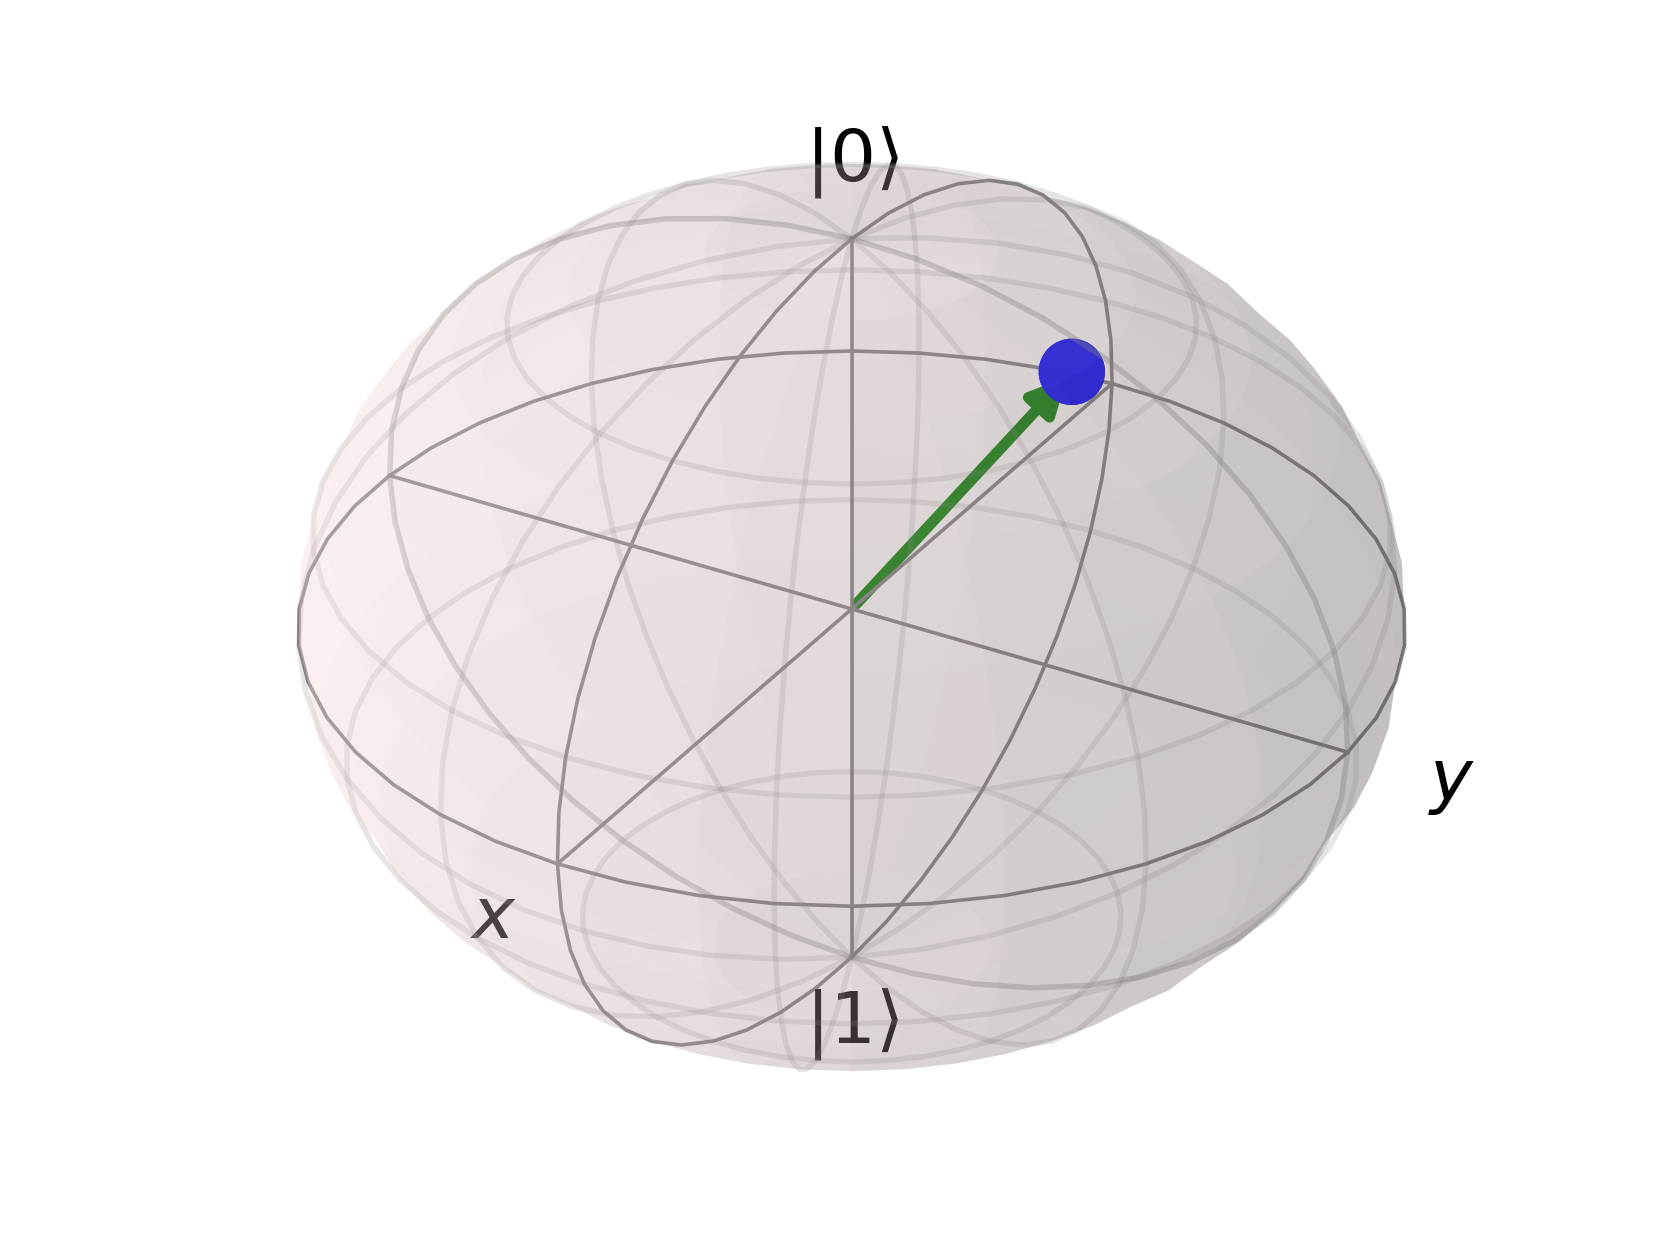

In [18]:
%matplotlib notebook
fig = viz_spin(qubit)

Or with vpython (in a notebook or in the console, the latter being better for interactive visuals):

In [ ]:
scene = vp.canvas(background=vp.color.white)
m = MajoranaSphere(qubit, scene=scene)

<hr>

Now one way of seeing that the state is uniquely determined by this point (up to complex phase) is to consider a perhaps less familiar construction:

Given a qubit $\mid \psi \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$, form the complex ratio $\frac{\beta}{\alpha}$. If $\alpha=0$, then this will go to $\infty$, which is fine, as we'll see!

So we have some $c = \frac{\beta}{\alpha}$. Suppose $c \neq \infty$. Then this is just a point on the complex plane: $c = x + iy$. Now imagine there's a unit sphere at the origin cut at the equator by the complex plane. And imagine you're standing at the South Pole, and you have a laser pointer, and you point the beam at $c$. 

The beam will intersect the sphere in exactly one location. If $c$ is outside the unit circle on the plane, you'll get a point on the southern hemisphere, and if $c$ is inside the unit circle, you'll get a point on the northern hemisphere. Every point in the plane, in this way, can be mapped to a point on the sphere--except we have a point left over, the South Pole itself! So if $\alpha = 0$, and therefore $c = \infty$, we map that point to the South Pole. In other words, we can think of $z = \frac{\beta}{\alpha}$ as being a point on the extended complex plane (the plane plus an extra point at infinity), which is just the sphere. This map is known as the stereographic projection.

Explicitly, if $c = x + iy$, then we have $(\frac{2x}{1+x^2+y^2}, \frac{2y}{1+x^2+y^2}, \frac{1-x^2-y^2}{1+x^2+y^2})$ or $(0,0,-1)$ if $z=\infty$.

Below, the map is depicted (where the pole of projection is the North Pole):

<img width=300 align='center' src="img/stereographic_projection.jpg">

Moreover, we can go in reverse: $c = \frac{x}{1+z} + i\frac{y}{1+z}$ or $\infty$ if $z=-1$.

In [19]:
c = spinor_c(qubit) # gives us our complex ratio
print("c: %s" % c)

xyz = c_xyz(c) # stereographically projects to the sphere
print("xyz: %s" % xyz)

c: (-0.9905580099071644-0.08527276925028497j)
xyz: [-0.99629837 -0.08576693  0.00579508]


As you can see, we get the same point which we obtained before via the expectation values $(\langle \hat{X} \rangle, \langle \hat{Y} \rangle, \langle \hat{Z} \rangle)$. Moreover, it's clear that every state will give us a unique point on the sphere, and vice versa, up to complex phase. And the bit about the phase is true because clearly if we rephase both $\alpha$ and $\beta$ by the same amount in $c = \frac{\beta}{\alpha}$, we'll end up with the same $c$. And we're only allowed to rephase, and not rescale, because of the normalization condition $|\alpha|^2 + |\beta|^2 = 1$.

And by the way, the phase matters: watch what happens to the phase (depicted in green), as we do a full rotation:

In [ ]:
scene = vp.canvas(background=vp.color.white)
m = MajoranaSphere(qubit, show_phase=True, scene=scene)
m.snapshot()
m.evolve(qt.jmat(1/2, 'y'), T=2*np.pi)

The phase goes to the negative of itself. Only after a full two turns does the state come back to itself completely, and this is what characterizes spin-$\frac{1}{2}$ representations. $SU(2)$ is the double cover of $SO(3)$ and what this means is that for every element in the usual rotation group, there are two elements of $SU(2)$.

In [ ]:
scene = vp.canvas(background=vp.color.white)
m = MajoranaSphere(qubit, show_phase=True, scene=scene)
m.snapshot()
m.evolve(qt.jmat(1/2, 'y'), T=4*np.pi)

<hr>


In any case, by means of the stereographic projection, we obtain the "Riemann sphere" (here depicted with the North Pole being the pole of projection:

<img width=300 align='center' src="img/riemann_sphere_plain.png">

We've just seen how each these cardinal directions can be associated with qubit states: in fact, the eigenstates of the Pauli matrices. And thus we observe the interesting fact that *antipodal* points on the sphere become *orthogonal* vectors in Hilbert space.

In [20]:
print([spinor_c(v) for v in qt.sigmax().eigenstates()[1]])
print([spinor_c(v) for v in qt.sigmay().eigenstates()[1]])
print([spinor_c(v) for v in qt.sigmaz().eigenstates()[1]])

[(-1+0j), (1.0000000000000002+0j)]
[-1j, (-0+1.0000000000000002j)]
[inf, 0j]


`spheres.coordinates` provides useful functions for going back and forth between coordinate systems on the sphere. E.g.:

In [21]:
print(xyz_c(xyz)) # back to extended complex coordinates
print(xyz_sph(xyz)) # spherical coordinates
print(c_sph(c)) # spherical coordinates, etc
print(c_spinor(c)) # back to a qubit, up to phase
print(compare_nophase(qubit, c_spinor(c)))

(-0.9905580099071642-0.08527276925028496j)
[1.56500121 3.22746653]
[1.56500121 3.22746653]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70915269+0.j        ]
 [-0.70245688-0.06047141j]]
True


<hr>

## A "constellation"

So we can represent a spin-$\frac{1}{2}$ state by a point on the "Bloch sphere" plus a complex phase, which gives us an intuitive geometrical picture of the quantum state, one which isn't immediately obvious when you look at it represented as a complex linear superpositon, say, of $Z$ eigenstates.

But what about higher spin states? Recall that spin representations are labeled by $j$ values, which count up from $0$ by half integers, and their dimensionality is $2j + 1$. Each basis state is associated with an $m$ value ranging from $-j$ to $j$, counting up by $1$. So basis states can be labeled $\mid j, m \rangle$. E.g.:

For spin-$0$: $\mid 0, 0 \rangle$.

For spin-$\frac{1}{2}$: $\mid \frac{1}{2}, \frac{1}{2} \rangle, \mid \frac{1}{2}, -\frac{1}{2} \rangle$.

For spin-$1$: $\mid 1, 1 \rangle, \mid 1, 0 \rangle, \mid 1, -1 \rangle$.

For spin-$\frac{3}{2}$: $\mid \frac{3}{2}, \frac{3}{2} \rangle, \mid \frac{3}{2}, \frac{1}{2} \rangle, \mid \frac{3}{2}, -\frac{1}{2} \rangle, \mid \frac{3}{2}, -\frac{3}{2} \rangle$.

And so on.

One might wonder if our simple geometrical representation for a qubit generalizes for higher spin. And the answer is yes! In fact, it was first proposed way back in 1932 by Ettore Majorana. The answer is both simple and elegant: a spin-$j$ state can be represented by a *constellation* of $2j$ points on the sphere (up to phase). These points are often poetically termed "stars" in the literature. 

So just as a spin-$\frac{1}{2}$ can be specified by a point on a sphere, a spin-$1$ state can be specified by two points on the sphere, a spin-$\frac{3}{2}$ state by three points on the sphere, and so on (again, up to phase).

<img width=300 align='center' src="img/three_star.png">

<hr>

The basic construction is this.

Given a spin-$j$ state in the $\mid j, m \rangle$ representation, $\mid \psi \rangle = \begin{pmatrix}a_{0} \\ a_{1} \\ a_{2} \\a_{3} \\ \vdots\end{pmatrix}$, form a complex polynomial in an unknown $z$:

$$ p(z) = \sum_{m=-j}^{m=j} (-1)^{j+m} \sqrt{\binom{2j}{j-m}} a_{j+m} z^{j-m} $$

The roots of this polynomial, called the Majorana polynomial, when stereographically projected from the complex plane to the sphere, yield the constellation. If you lose a degree, (i.e. if the coefficients for the highest powers of $z$ are $0$) then you add a root "at infinity" for each one, and so the spin-$j$ state can always be specified by $2j$ point on the sphere.

In other words, by the fundamental theorem of algebra, no less, a spin-$j$ state factorizes into $2j$ pieces.

<img src="img/majorana_doodle.png">

As the above image indicates, the $\mid j, m\rangle$ basis states (assuming we've quantized along the $Z$ direction) consist of (in the case of spin-$\frac{3}{2}$) three stars at the North Pole, none at the South Pole; two stars at the North Pole, one at the South Pole; one at the North Pole, two at the South Pole; none at the North Pole, three at the South Pole. Any spin state can be expressed as a complex linear superposition of these basis states/constellations. 

At the same time, thanks to Majorana, we can also interpret the spin state as a polynomial and find its roots. Each corresponds to a little monomial whose product (as opposed to sum) determines the same state. Each root is associated with a direction in 3D, and under rotations, the stars transform rigidly as a whole constellation.

In [22]:
from spheres import *
spin = xyz_spin([[1,0,0], [0,1,0],[0,0,1]])
print("cartesian stars:\n%s" % spin_xyz(spin))
print("spherical stars:\n%s" % spin_sph(spin))
print("extended complex stars:\n%s" % "\n".join([str(c) for c in spin_c(spin)]))

cartesian stars:
[[2.22044605e-16 1.00000000e+00 2.22044605e-16]
 [1.00000000e+00 8.32667268e-17 2.22044605e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
spherical stars:
[[1.57079633e+00 1.57079633e+00]
 [1.57079633e+00 8.32667268e-17]
 [0.00000000e+00 0.00000000e+00]]
extended complex stars:
(2.220446049250313e-16+0.9999999999999998j)
(0.9999999999999998+8.326672684688674e-17j)
0j


In [ ]:
scene = vp.canvas(background=vp.color.white)
m = MajoranaSphere(spin, scene=scene)
m.evolve(qt.jmat(3/2, 'y'), dt=0.01, T=5)

We can use matplotlib for this too:

<IPython.core.display.Javascript object>


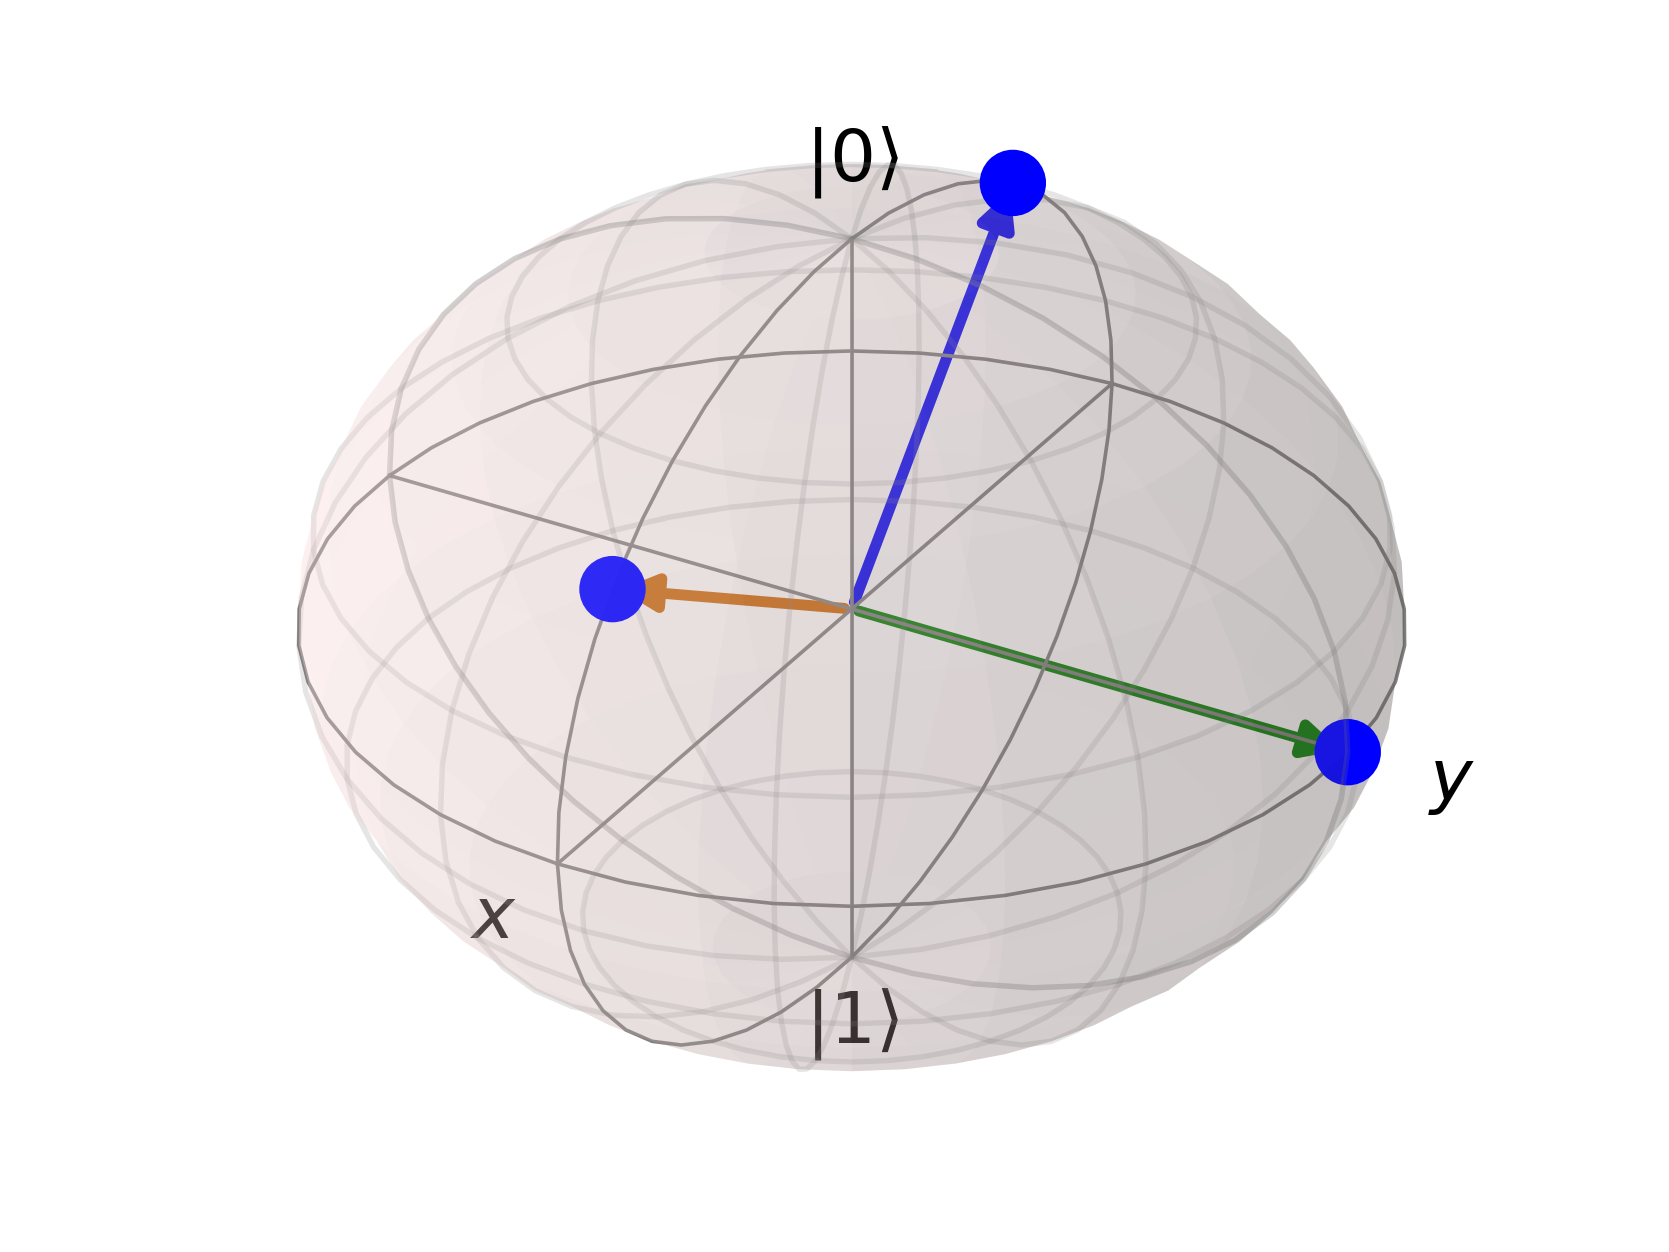

In [23]:
%matplotlib notebook
anim = animate_spin(spin, qt.jmat(3/2, 'y'))

<hr>

We can understand the Majorana polynomial a little better by considering <a href="https://en.wikipedia.org/wiki/Vieta%27s_formulas">Vieta's formulas</a> which relate the roots to the coefficients of a polynomial.

Given a polynomial $f(z) = c_{n}z^n + c_{n-1}z^{n-1} + \dots + c_{1}z + c_{0}$, if we denote its roots by $r_{i}$, we can write:

$c_{n} = c_{n}$

$c_{n-1} = -c_{n}\big{[} r_{1} + r_{2} + \dots \big{]}$

$c_{n-2} = c_{n}\big{[} r_{1}r_{2} + r_{1}r_{3} + r_{2}r_{3} + \dots  \big{]}$

$c_{n-3} = -c_{n}\big{[} r_{1}r_{2}r_{3} + r_{1}r_{2}r_{4} + r_{2}r_{3}r_{4} + \dots \big{]}$

$\vdots$

$c_{0} = (-1)^{n} c_{n} \big{[} r_{1}r_{2}\dots r_{n} \big{]}$

In other words, if we divide out by the leading coefficient $c_{n}$, which doesn't affect the roots, the $c_{0}$ coefficient is given $(-1)^n$ times the product of the roots, the $c_{1}$ coefficient is given by $(-1)^{n-1}$ times the sum of the products of pairs of roots, the $c_{2}$ coefficient is given by $(-1)^{n-2}$ times the sum of products of triples of roots, and so forth. In each of these expressions, there will be $\binom{n}{n-k}$ terms corresponding to $c_{k}$. 

So reading the Majorana formula in reverse, it tells us that if we want to go from a polynomial to a spin state, we should divide each coefficient by the square root of the number of terms in Vieta's formula that contribute to it, and multiply by the power of $-1$. 

The importance of the latter becomes clear, if we consider the simplest case of a monomial (aka a qubit). Suppose we want the star to be in the $X+$ direction. As an unnormalized spin state, this is $\begin{pmatrix} 1 \\ 1 \end{pmatrix}$, and as an extended complex coordinate, this is just $z=1$. So our monomial is $z - 1 = 0$. But if we want to convert the coefficients of this monomial into the components of the spin, we have to flip the negative sign. The powers of $-1$ in the Majorana formula handle this in the general case.





<hr>

Here are some interesting videos showing the dynamics. As I said, a rotation rotates all the stars individually:

![yrot](img/yrot.gif)

If a spin is in an eigenstate of some Hamiltonian, its constellation will be fixed. But if you perturb it out of the eigenstate, the stars will precess around their former locations:

![perturb](img/perturb.gif)

This can lead to some cool effects:

![cool](img/cool.gif)

If you perturb them far enough, they start to swap places:

![swap](img/swap.gif)

And finally, you can have as many stars as you please! They look like little charged particle confined to the surface of the sphere, and there is indeed something to that analogy as work by Leboeuf and Bruno have shown.

![lotsa](img/lotsa.gif)

Check out the documentation for `MajoranaSphere` to learn how to leave trails (set `make_trails=True`), as well as how to set the color of the stars. Beware though, if you do this, there may be some numerical errors, since when the polynomial solver returns the roots, they won't necessarily be in the same order every time! I have a hack to get around this, but it isn't perfect.

<hr>

## Spin Coherent States

Probably the best way to understand why the Majorana construction works is in terms of "spin coherent states." Spin coherent states have all their angular momentum concentrated in one direction on the sphere. In other words, all their "stars" all coincide at just one point. As such, for a given $j$ value, there is a spin coherent state for each point on the sphere. It turns out that the spin coherent basis form an overcomplete basis or "frame" for spin states. This is, of course, not an othogonal basis, and indeed, there are an infinite number of elements: but knowing the amplitudes of a given spin state on each of the spin coherent states determines the state. In other words, the spin coherent states form a resolution of the identity.

So for example, just as we write $\psi(x)$ for $\langle x \mid \psi \rangle$ for a position wavefunction, for a spin, we could write $\psi(\tilde{z}) = \langle \tilde{z} \mid \psi \rangle$, where $\tilde{z}$ represents a point on the sphere given as a extended complex coordinate.

Now it turns out, if we normalize our Majorana polynomial $p(z)$ from before: 

$p(z) = \frac{e^{-2ij\theta}}{(1+r^2)^j} \sum_{m=-j}^{m=j} (-1)^{j+m} \sqrt{\binom{2j}{j-m}} a_{j+m} z^{j-m}$

Where $z=re^{i\theta}$, then:

$\langle \tilde{z} \mid \psi \rangle = p(z)$

Where $\tilde{z}$ is the point antipodal to $z$ on the sphere, and $\mid \tilde{z} \rangle$ is the spin coherent state with all the stars at the point $\tilde{z}$. Note that to evaluate the Majorana polynomial at $\infty$, it suffices to return the coefficient corresponding to the highest degree (and normalized in the above case). This amounts to evaluating the polynomial at 0 in a flipped coordinate chart.

In other words, the spin coherent amplitude will always be 0 opposite to a Majorana star. Another way of saying this is that the Majorana stars represent those directions for which there is a 0% chance that all the angular momentum will be concentrated in the opposite direction. This gives them an operational meaning: if I send a spin through a Stern-Gerlach oriented in the direction of a star, then there's a 0% chance that it'll be found in the state with all the angular momentum in the opposite direction. Moreover, the spin state is fully characterized by these 0 probability points. Indeed, one can work with the probability distribution itself (often called a Husimi distribution) with no loss of generality (up to phase), since it has the same 0's. 

Note that the normalization makes the resulting function non-holomorphic.


In [29]:
from spheres import *

j = 3/2
spin = qt.rand_ket(int(2*j+1))
p = spin_poly(spin, projective=True, normalized=True)
s = lambda z: (spin_coherent(j, antipodal(z), from_complex=True).dag()*spin)[0][0][0]

c = rand_c()
print("majorana: %s" % p(c))
print("spin coherent: %s" % s(c))

majorana: (0.5726321887977408+0.36878212146672185j)
spin coherent: (0.5726321887977408+0.3687821214667217j)


We could have also done it in terms of cartesian coordinates:

In [30]:
from spheres import *

j = 3/2
spin = qt.rand_ket(int(2*j+1))
p = spin_poly(spin, cartesian=True, normalized=True)
s = lambda xyz: (spin_coherent(j, -xyz).dag()*spin)[0][0][0]

xyz = rand_xyz()
print("majorana: %s" % p(xyz))
print("spin coherent: %s" % s(xyz))

majorana: (-0.3381956446920869-0.3644345696570041j)
spin coherent: (-0.33819564469208685-0.3644345696570041j)


If we further normalize the Majorana polynomial by $\sqrt{\frac{2j+1}{4\pi}}$, then we can express the inner product between two spin states as an integral over the sphere:

In [31]:
from spheres import *

a = qt.rand_ket(3)
b = qt.rand_ket(3)
print("amplitude: %s " % (a.dag()*b)[0][0][0])

a_func = spin_poly(a, for_integration=True)
b_func = spin_poly(b, for_integration=True)

import quadpy
scheme = quadpy.u3.get_good_scheme(19)
print("amplitude %s" % scheme.integrate_spherical(lambda sph: a_func(sph).conj()*b_func(sph)))

print("amplitude %s" % spherical_inner(a_func, b_func))

amplitude: (0.15085036103837118+0.6265137597537351j) 
amplitude (0.15085036103837118+0.6265137597537351j)
amplitude (0.15085036103837118+0.6265137597537351j)


We can visualize the spin coherent amplitudes as arrows at each point on the sphere. Observe how the "spin coherent wavefunction" is 0 opposite to the stars.

In [ ]:
from spheres import *
scene = vp.canvas(background=vp.color.white)

spin = qt.rand_ket(3)
m = MajoranaSphere(spin, show_wavefunction=True, wavefunction_type="coherent", scene=scene)

Alternatively, we can visualize the normalized Majorana function itself whose 0's *are* the stars.

In [ ]:
scene = vp.canvas(background=vp.color.white)
n = MajoranaSphere(spin, show_wavefunction=True, wavefunction_type="majorana", scene=scene)

<hr>

Finally, here's a cute algebraic demonstration of why this works:

Suppose we have some spin-$1$ vector: $\mid \psi \rangle = \begin{pmatrix} a \\ b \\ c \end{pmatrix}$. Its Majorana polynomial is $p(z) = az^2 - \sqrt{2}bz + c$.

Meanwhile, we form a spin-$1$ coherent polynomial, which will have two stars at a given point $\alpha$: 

$(z - \alpha)^{2} = z^{2} - 2\alpha z + \alpha^2$

And then convert it into a ket: $\begin{pmatrix} 1 \\ \frac{2}{\sqrt{2}}\alpha \\ \alpha^{2} \end{pmatrix}$ = $\begin{pmatrix} 1 \\ \sqrt{2} \alpha \\ \alpha^{2} \end{pmatrix}$ . 

Now let's rename $\alpha$ to $z$: $\begin{pmatrix} 1 \\ \sqrt{2} z \\ z^{2} \end{pmatrix}$

Just for show, why not normalize it? 

$N = \frac{1}{\sqrt{1 + 2zz^{*} + (z^2)(z^2)^{*}}} = \frac{1}{\sqrt{1 + 2|z|^2 + |z|^4}} = \frac{1}{\sqrt{(1 + |z|^2)^{2}}} = \frac{1}{1 + |z|^2}$

Giving: $\frac{1}{1 + |z|^2} \begin{pmatrix} 1 \\ \sqrt{2}z \\ z^{2} \end{pmatrix}$.

Now let's form the inner product $\langle \psi \mid z \rangle$. (Technically, we want $\langle z \mid \psi \rangle$, but $\langle z \mid \psi \rangle = \langle \psi \mid z \rangle^{*}$, and this is easier for this demonstration.)

$\begin{pmatrix} a^{*} & b^{*} & c^{*} \end{pmatrix} \frac{1}{1 + |z|^2} \begin{pmatrix} 1 \\ \sqrt{2}z \\ z^{2} \end{pmatrix} = \frac{1}{1 + |z|^2} \big{(} a^{*} + \sqrt{2}b^{*}z + c^{*}z^{2} \big{)}$

So now we have: $h(z) =  \frac{1}{1 + |z|^2} \big{(} c^{*}z^{2} + \sqrt{2}b^{*}z + a^{*} \big{)}$. 

Now it happens that if we take a complex vector, flip its components left/right, complex conjugate the elements, and flip every other sign, then we get the antipodal constellation.

In [32]:
spin = qt.rand_ket(5)
print("stars:\n%s" % spin_xyz(spin))

antipodal_spin = qt.Qobj(np.array([c*(-1)**i for i, c in enumerate(components(spin).conj()[::-1])]))
print("antipodal stars:\n%s" % spin_xyz(antipodal_spin))

stars:
[[ 0.61569799 -0.18244856 -0.76656931]
 [ 0.81965758 -0.55147919  0.15502305]
 [-0.08533574  0.98796788  0.12898561]
 [-0.98417313  0.11334806  0.13621846]]
antipodal stars:
[[ 0.98417313 -0.11334806 -0.13621846]
 [ 0.08533574 -0.98796788 -0.12898561]
 [-0.81965758  0.55147919 -0.15502305]
 [-0.61569799  0.18244856  0.76656931]]


So let's do that:

So: $h(z) \rightarrow  p(z) = \frac{1}{1 + |z|^2} \big{(} az^{2} - \sqrt{2}bz + c \big{)}$.

Ignoring the normalization, which was just for fun, and plugging this into the reverse Majorana polynomial, we obtain the ket: $\begin{pmatrix} a \\ b \\ c \end{pmatrix}$, which is exactly what we started with.

## Bibliography

[Geometry of quantum states : an introduction to quantum entanglement](https://chaos.if.uj.edu.pl/~karol/geometry.htm)

[Coherent-State Approach for Majorana Representation](https://arxiv.org/abs/1601.07612)

[Phase space approach to quantum dynamics](https://iopscience.iop.org/article/10.1088/0305-4470/24/19/021)

[Majorana Representation of Higher Spin States](https://www.reed.edu/physics/faculty/wheeler/documents/Quantum%20Mechanics/Miscellaneous%20Essays/Angular%20Momentum,%20Spin/D2.%20Majorana.pdf)

[Quantum Geometric Phase in Majorana’s Stellar Representation: Mapping onto a Many-Body Aharonov-Bohm](https://arxiv.org/abs/1204.2372)